# Clusterization test in news 
### Objective: Test the formation of clusters in smaller "documents" and then ask a question to identify the best cluster.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

### 1 - Embbedding

In [2]:
#Read smallnews.csv dataframe 
from dotenv import load_dotenv
import os
df = pd.read_csv('smallnews.csv')
df.head()



,text
0,"IPCA: preços sobem 0,83% em fevereiro, com rea..."
1,Governo fará 'rodízio' para 'oxigenar' conselh...
2,"Jornal da Globo, Hora 1 e Jornal Hoje estreiam..."
3,Conheça detalhes da ilha à venda por R$ 10 mil...
4,Instagram de Leidy Elin fica fora do ar após c...


In [3]:
# Embedding using gpt:
load_dotenv()
import openai
def generate_embeddings_openai(text, openai_api_key = os.getenv('OPEN_AI_API_KEY')):
    """
    Generate embeddings for a list of texts using OpenAI's Ada model.
    
    :param texts: A list of strings (text data).
    :param openai_api_key: Your OpenAI API key.
    :return: A list of embeddings.
    """
    openai.api_key = openai_api_key
    # Get the embedding from OpenAI's Ada model
    response = openai.Embedding.create(
        input=[text],  # API expects a list of texts
        model="text-embedding-ada-002"  # Use the appropriate embedding model
    )
    
    # Extract the embedding vector
    embedding_list = response['data'][0]['embedding']
    print(embedding_list)
    
    return embedding_list

df['embedding'] = df['text'].apply(generate_embeddings_openai)


[-0.009089258499443531, 0.01505186315625906, 0.023798739537596703, -0.044031545519828796, 0.0012451702496036887, -0.003588545136153698, -0.004799799993634224, -0.017054472118616104, 0.0005696936277672648, -0.02377290092408657, 0.007978133857250214, 0.007345051039010286, 0.010504004545509815, -0.007829553447663784, -0.002805266762152314, 0.015245663933455944, 0.026847872883081436, 0.013837378472089767, 0.01959972269833088, -0.011712029576301575, 0.014651341363787651, 0.020517045632004738, -0.01443170104175806, 0.006346976850181818, -0.02192533202469349, -0.016072547063231468, 0.0156849455088377, -0.019044160842895508, 0.029121803119778633, -0.021899491548538208, 0.01432834006845951, -0.02236461453139782, -0.024728983640670776, 0.0019428532104939222, -0.035969432443380356, -0.02310105785727501, -0.022054532542824745, -0.00997428223490715, 0.030387967824935913, 0.01571078598499298, 0.017816755920648575, 0.005403812974691391, 0.010743025690317154, 0.007991054095327854, -0.01400533877313137

# 2 - Clusterization with kmeans

C:\Users\Cliente\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Cliente\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Cliente\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.

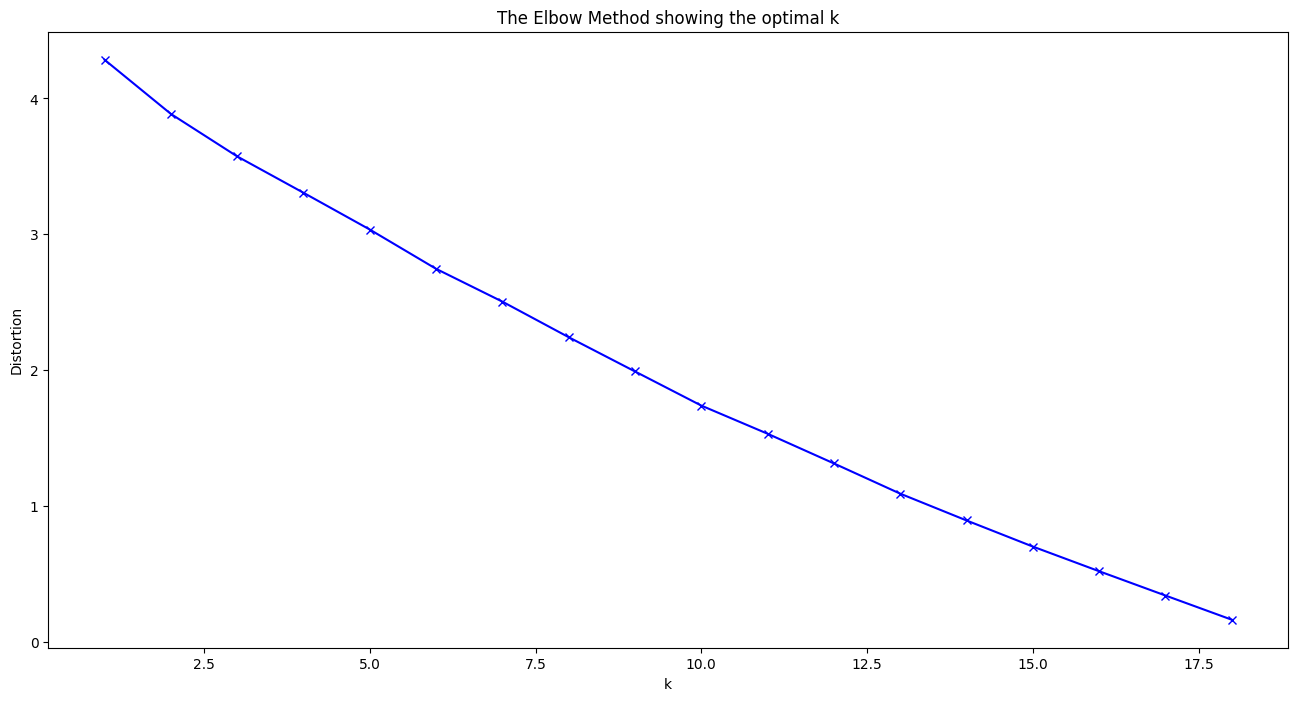

In [4]:
#Find the optimal k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
K = range(1, 19)  # Change 11 to a different value if you want to explore more clusters
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df['embedding'].to_list())
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [5]:
# Replace 'optimal_k' with the number of clusters you chose
optimal_k = 5  # Example
n_neighbors = optimal_k
kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(df['embedding'].to_list())

# The cluster labels for each data point
cluster_labels = kmeans.labels_


C:\Users\Cliente\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
df['cluster'] = cluster_labels
df

,text,embedding,cluster
0,"IPCA: preços sobem 0,83% em fevereiro, com rea...","[-0.009089258499443531, 0.01505186315625906, 0...",1
1,Governo fará 'rodízio' para 'oxigenar' conselh...,"[-0.011013809591531754, -0.012296780943870544,...",1
2,"Jornal da Globo, Hora 1 e Jornal Hoje estreiam...","[-0.002020364161580801, 0.005566783249378204, ...",2
3,Conheça detalhes da ilha à venda por R$ 10 mil...,"[-0.005022505763918161, -0.004893475212156773,...",2
4,Instagram de Leidy Elin fica fora do ar após c...,"[-0.026652267202734947, 0.01379280723631382, -...",4
5,Ana Hickmann e Edu Guedes assumem namoro\r\n'É...,"[-0.00952045526355505, 0.0006956022698432207, ...",4
6,Decisão da Justiça muda regras para o uso de a...,"[0.019053256139159203, 0.02742069959640503, 0....",1
7,Apreensão de macacos na casa de Nicole Bahls i...,"[-0.0157011691480875, 0.01155706774443388, -0....",0
8,Lily Allen diz que filhas arruinaram sua carre...,"[-0.014112245291471481, 0.011222968809306622, ...",4
9,Imposto de Renda 2024: como baixar o programa\...,"[-0.025645669549703598, -0.017123214900493622,...",1


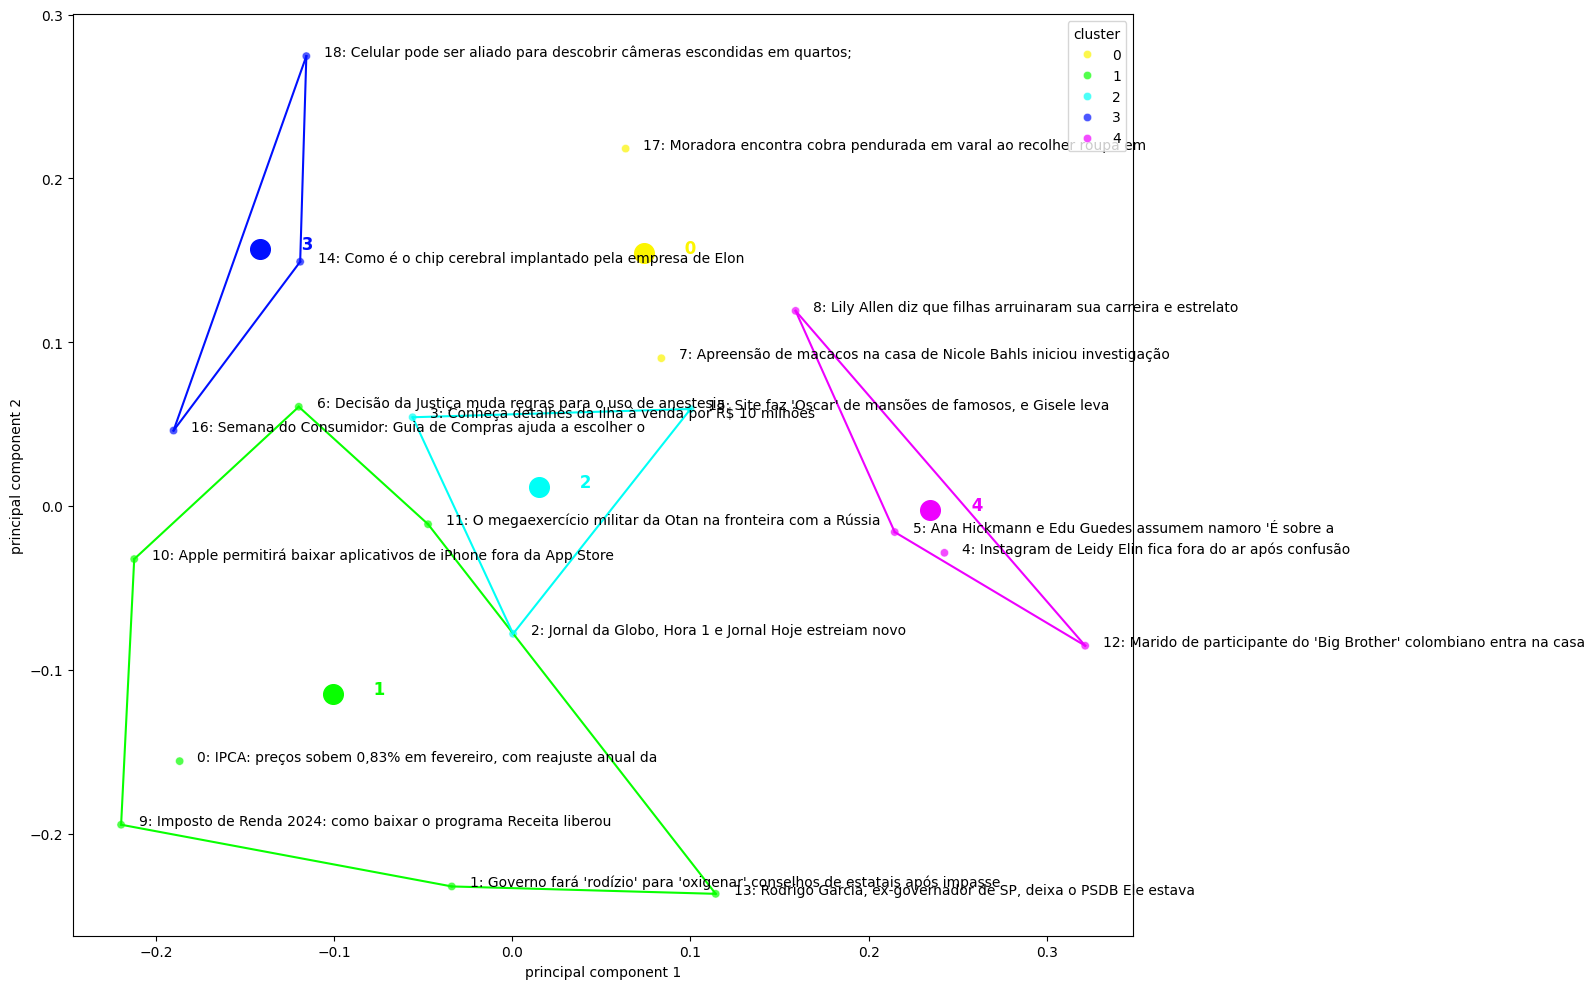

In [7]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial import ConvexHull

# Assuming 'df' is your DataFrame that includes 'embedding', 'text', and 'cluster' columns
embeddings_array = np.stack(df['embedding'].values)

# Perform PCA on the embeddings
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(embeddings_array)

# Create a new DataFrame for the reduced data
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
principalDf['text'] = df['text'].apply(lambda x: ' '.join(x.split()[:10]))  # Keep only the first 10 words
principalDf['cluster'] = df['cluster']  # Add the cluster information
principalDf['index'] = df.index  # Add the row index for labeling

# Convert PCA components to numeric, just in case there's any data type issue
principalDf['principal component 1'] = pd.to_numeric(principalDf['principal component 1'], errors='coerce')
principalDf['principal component 2'] = pd.to_numeric(principalDf['principal component 2'], errors='coerce')

# Recalculate the centroids using only the numeric PCA components
centroids = principalDf.groupby('cluster')[['principal component 1', 'principal component 2']].mean()

# Plot the clusters
plt.figure(figsize=(16,10))
unique_clusters = principalDf['cluster'].nunique()  # Count unique clusters for palette

# Assign a color palette so that we can make centroids match their clusters
palette = sns.color_palette("hsv", unique_clusters)

# Create scatter plot for clusters
cluster_plot = sns.scatterplot(
    x='principal component 1', y='principal component 2',
    hue="cluster",
    palette=palette,  # Use the assigned color palette for clusters
    data=principalDf,
    legend="full",  # Ensure legend is requested
    alpha=0.7
)

# Draw Convex Hull for each cluster
for cluster_label in principalDf['cluster'].unique():
    # Extract points belonging to the current cluster
    points = principalDf[principalDf['cluster'] == cluster_label][['principal component 1', 'principal component 2']].to_numpy()
    if points.shape[0] > 2:  # Need at least 3 points to form a hull
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], '-', color=palette[cluster_label % len(palette)])  # Draw boundary

# Plot centroids on top
for (index, row), color in zip(centroids.iterrows(), palette):
    plt.scatter(row['principal component 1'], row['principal component 2'], 
                s=200, color=color, marker='o')  # Plot each centroid with its cluster's color
    # Annotate the centroid with the cluster number
    plt.text(row['principal component 1'] + 0.02, row['principal component 2'], 
             ' ' + str(index), color=color, fontsize=12, weight='bold')

# Annotate each point with its index and the first 10 words of its text
for i, point in principalDf.iterrows():
    annotation_text = f"{point['index']}: {point['text']}"  # Combine index and text
    plt.text(point['principal component 1'] + 0.01, point['principal component 2'], 
             annotation_text, horizontalalignment='left', size='medium', color='black')  # The text to display

plt.tight_layout()  # Adjust the plot to make room for annotations
plt.show()  # Display the plot


In [16]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'df' is your DataFrame that includes 'embedding', 'text', and 'cluster' columns
embeddings_array = np.stack(df['embedding'].values)

# Perform PCA on the embeddings
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(embeddings_array)

# Create a new DataFrame for the reduced data
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
principalDf['text'] = df['text'].apply(lambda x: ' '.join(x.split()[:10]))  # Keep only the first 10 words
principalDf['cluster'] = df['cluster']  # Add the cluster information
principalDf['index'] = df.index  # Add the row index for labeling

# Fit a KNN model
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(principalDf[['principal component 1', 'principal component 2']], principalDf['cluster'])

# Create the mesh grid for decision boundaries as before
x_min, x_max = principalDf['principal component 1'].min() - 1, principalDf['principal component 1'].max() + 1
y_min, y_max = principalDf['principal component 2'].min() - 1, principalDf['principal component 2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# Predict cluster assignments for each point in the mesh using the fitted KNN model
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a Plotly figure
fig = go.Figure()

# Add the mesh grid as a contour plot to represent the KNN decision boundaries
fig.add_trace(go.Contour(
    x=np.linspace(x_min, x_max, 300), 
    y=np.linspace(y_min, y_max, 300), 
    z=Z,  # Decision boundary
    showscale=False,  # Hide the color scale
    colorscale='Viridis',  # Color scheme
    opacity=0.5  # Transparency of the contour
))

# Use Plotly Express to get a discrete color sequence
colors = px.colors.qualitative.Set3  # Or choose any other qualitative palette

# Map each cluster label to a color
cluster_ids = sorted(principalDf['cluster'].unique())
color_map = {cluster_id: colors[i % len(colors)] for i, cluster_id in enumerate(cluster_ids)}



# Print out the color map to verify
print("Cluster to Color Mapping:", color_map)



# Iterate through each cluster to add PCA points as separate scatter plots
for cluster_id in cluster_ids:
    cluster_df = principalDf[principalDf['cluster'] == cluster_id]
    fig.add_trace(go.Scatter(
        x=cluster_df['principal component 1'],
        y=cluster_df['principal component 2'],
        mode='markers',
        name=f'Cluster {cluster_id}',  # Name of the trace, used in the legend
        marker=dict(
            size=10,
            color=color_map[cluster_id],  # Apply the color from the map
            line=dict(width=1, color='DarkSlateGrey')
        ),
        text=[f"{idx}: {txt}" for idx, txt in zip(cluster_df['index'], cluster_df['text'])],  # Text to be displayed on hover
        hoverinfo='text'
    ))



# Set the layout of the figure
fig.update_layout(
    title='PCA Cluster Visualization with Interactive Decision Boundaries',
    xaxis_title='Principal Component 1',
    yaxis_title='Principal Component 2',
    legend_title='Cluster',
    hovermode='closest'
)

# Show the figure
fig.show()


C:\Users\Cliente\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



Cluster to Color Mapping: {0: 'rgb(141,211,199)', 1: 'rgb(255,255,179)', 2: 'rgb(190,186,218)', 3: 'rgb(251,128,114)', 4: 'rgb(128,177,211)'}


In [17]:
!pip install --upgrade nbformat


In [18]:
query = "quero saber do macaco da nicole "
# Convert the query embedding to a NumPy array and reshape it for PCA if it's a flat array
query_embedding = np.array(generate_embeddings_openai(query)).reshape(1, -1)

# First, transform the query embedding using the same PCA transformation applied to the dataset
query_transformed = pca.transform(query_embedding)

# Then, predict the cluster for the transformed query embedding (using only the first two principal components)
query_cluster = knn.predict(query_transformed[:, :2])

# Now, query_cluster contains the cluster number for your query point
print(f"The query embedding belongs to cluster: {query_cluster[0]}")


[-0.021371109411120415, 0.0002505925658624619, 0.0012421717401593924, -0.02632061205804348, -0.0024443764705210924, 0.029876068234443665, 0.03563130274415016, 0.00517331762239337, -0.01399161759763956, 0.016600657254457474, 0.024197569116950035, -0.020578164607286453, 0.021921053528785706, -0.008172434754669666, 0.0070022037252783775, 0.009310692548751831, 0.03593825176358223, -0.014848507940769196, 0.005160528235137463, -0.007846305146813393, 0.006829546298831701, 0.025041669607162476, 0.004057441372424364, -0.029620280489325523, 0.019708484411239624, -0.007820726372301579, 0.001589883933775127, -0.02690892480313778, 0.011005289852619171, -0.02380109764635563, 0.0037504953797906637, 0.004533846862614155, 0.005467473994940519, -0.015424031764268875, -0.025553246960043907, -0.015577505342662334, 0.006433074828237295, -0.002054299460723996, -0.00558257894590497, 0.007839909754693508, -0.010487318970263004, 0.008287539705634117, -0.006631310563534498, -0.013633513823151588, -0.01516824401

C:\Users\Cliente\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



In [20]:
fig.add_trace(go.Scatter(
    x=[query_transformed[0, 0]],  # Use the first principal component
    y=[query_transformed[0, 1]],  # Use the second principal component
    mode='markers+text',
    marker=dict(
        size=12,
        color='rgba(255, 182, 193, .9)',  # Use a distinct and visible color for the query point, e.g., light pink
        line=dict(width=2, color='DarkSlateGrey'),
        symbol='x'  # Change marker shape to 'X'
    ),
    text=f"Query (Cluster {query_cluster[0]}): {query}",  # Displaying actual query text next to the point
    textposition="top center",  # Position the text above the marker
    hoverinfo='text',
    showlegend=False,
    textfont=dict(  # Customize font properties for better visibility
        family="Arial, sans-serif",
        size=18,  # Larger font size for better readability
        color="DarkSlateGrey"  # Font color that stands out yet readable
    )
))

# Show the updated figure
fig.show()
